In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [31]:
daily_stat = pd.read_csv('HH28_daily_stat.csv')
daily_stat

,Date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,SH_temp_mean,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean
0,2020-02-14,4.87,10.800000,2.900000,6.666667,90.000000,70.333333,80.444444,23.0150,17.340000,20.341797,64.7625,52.325000,58.853906,25.80,17.61,21.665312,67.2,44.00,56.163542
1,2020-02-15,4.64,12.466667,6.433333,9.954167,89.000000,70.000000,81.375000,22.3850,18.093333,20.534314,65.7500,56.675000,61.461372,24.69,17.98,21.448750,64.7,48.20,58.069792
2,2020-02-16,2.89,10.233333,5.833333,8.009028,83.666667,54.333333,69.006944,21.7300,17.522500,19.539167,61.9000,48.775000,57.619878,22.43,17.30,19.648438,63.6,47.30,57.496875
3,2020-02-17,4.20,10.033333,5.500000,7.310417,77.666667,57.333333,63.868056,25.4550,17.775000,20.765053,62.0000,44.600000,54.456206,24.31,17.37,20.143889,55.5,48.00,52.752778
4,2020-02-18,3.00,9.566667,3.833333,6.413889,80.333333,60.000000,69.444444,21.4025,17.625000,19.366068,59.9500,52.600000,56.331684,22.62,17.40,19.904167,57.4,49.50,54.038889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-02-26,0.00,11.566667,2.366667,6.561111,87.666667,52.666667,73.986111,23.3850,18.912500,21.344965,64.0500,52.775000,59.361493,27.49,18.98,22.295208,64.4,42.40,55.401042
379,2021-02-27,8.51,11.800000,1.133333,6.433333,90.000000,50.666667,73.423611,25.6550,18.942500,22.011137,59.7000,50.250000,55.538333,29.54,18.97,23.284583,80.3,40.02,50.916042
380,2021-02-28,3.91,11.466667,1.033333,6.178472,90.000000,51.666667,73.333333,25.8050,19.715000,22.858767,54.2500,42.626667,50.582951,28.35,19.84,23.720938,52.8,38.17,47.506875
381,2021-03-01,3.52,11.466667,2.300000,5.593750,87.666667,52.333333,75.562500,26.2075,19.285000,22.346875,53.0500,42.700000,49.652413,28.23,19.45,22.969896,52.0,36.80,46.765104


In [32]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] < 15:
        return 'SH+DWH'
    else:
        return 'DWH'


In [33]:

# Apply the function to create a new column
daily_stat['Heating_Period'] = daily_stat.apply(classify_heating_period, axis=1)

In [40]:
daily_stat['ext_temp_mean'].describe()

count    383.000000
mean      10.689407
std        5.000135
min       -0.736806
25%        7.251736
50%       10.539931
75%       14.282986
max       24.492361
Name: ext_temp_mean, dtype: float64

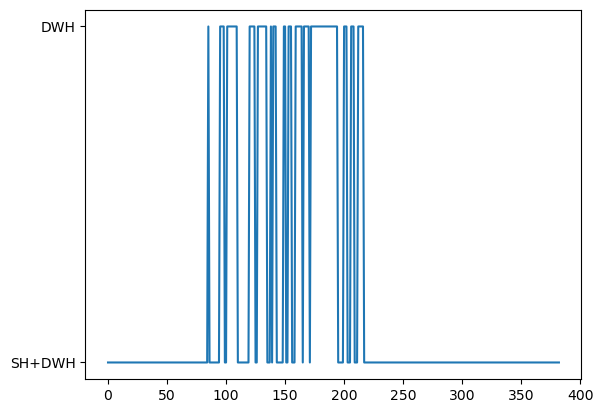

In [41]:
plt.plot(daily_stat['Heating_Period'])
plt.show()

In [49]:
daily_rounded = pd.DataFrame(daily_stat)

In [ ]:
columns_to_round = daily_stat.columns.drop('Date')


In [50]:
daily_rounded[columns_to_round] = daily_rounded[columns_to_round].round()


In [114]:
daily_rounded.head(70)

,Date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean,Heating_Period
0,2020-02-14,5.0,11.0,3.0,7.0,90.0,70.0,80.0,23.0,17.0,...,65.0,52.0,59.0,26.0,18.0,22.0,67.0,44.0,56.0,SH+DWH
1,2020-02-15,5.0,12.0,6.0,10.0,89.0,70.0,81.0,22.0,18.0,...,66.0,57.0,61.0,25.0,18.0,21.0,65.0,48.0,58.0,SH+DWH
2,2020-02-16,3.0,10.0,6.0,8.0,84.0,54.0,69.0,22.0,18.0,...,62.0,49.0,58.0,22.0,17.0,20.0,64.0,47.0,57.0,SH+DWH
3,2020-02-17,4.0,10.0,6.0,7.0,78.0,57.0,64.0,25.0,18.0,...,62.0,45.0,54.0,24.0,17.0,20.0,56.0,48.0,53.0,SH+DWH
4,2020-02-18,3.0,10.0,4.0,6.0,80.0,60.0,69.0,21.0,18.0,...,60.0,53.0,56.0,23.0,17.0,20.0,57.0,50.0,54.0,SH+DWH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2020-04-19,2.0,16.0,6.0,11.0,84.0,28.0,52.0,25.0,21.0,...,57.0,45.0,52.0,26.0,20.0,22.0,100.0,47.0,55.0,DWH
66,2020-04-20,2.0,16.0,5.0,10.0,80.0,30.0,54.0,26.0,21.0,...,53.0,44.0,49.0,25.0,20.0,22.0,54.0,44.0,51.0,DWH
67,2020-04-21,3.0,18.0,7.0,12.0,74.0,32.0,54.0,25.0,21.0,...,56.0,44.0,49.0,25.0,21.0,22.0,100.0,45.0,54.0,DWH
68,2020-04-22,1.0,20.0,7.0,13.0,80.0,34.0,55.0,24.0,21.0,...,56.0,50.0,53.0,25.0,21.0,22.0,57.0,47.0,54.0,DWH


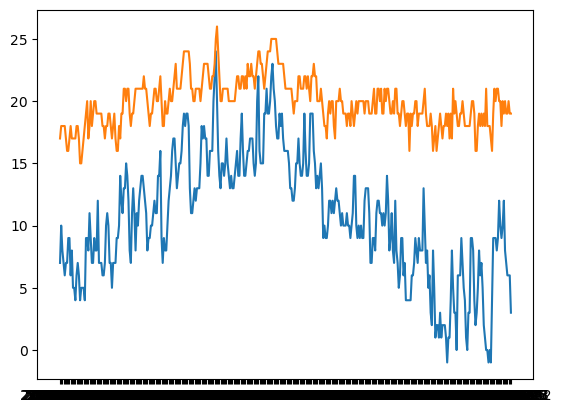

In [115]:
plt.plot(daily_rounded['Date'],daily_rounded['ext_temp_mean'])
#plt.plot(daily_rounded['Date'],daily_rounded['SH_temp_mean'])
plt.plot(daily_rounded['Date'],daily_rounded['SH_temp_min'])
#plt.plot(daily_rounded['Date'],daily_rounded['SH_temp_max'])

plt.show()

In [131]:
# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] < 15 and row['SH_temp_min'] <= 20 and row['SH_temp_max'] > 20 :
        return 'SH+DWH'
    else:
        return 'DWH'


In [132]:

# Apply the function to create a new column
daily_rounded['Heating_Period'] = daily_rounded.apply(classify_heating_period, axis=1)

In [133]:
daily_rounded['Heating_Period']

0      SH+DWH
1      SH+DWH
2      SH+DWH
3      SH+DWH
4      SH+DWH
        ...  
378    SH+DWH
379    SH+DWH
380    SH+DWH
381    SH+DWH
382    SH+DWH
Name: Heating_Period, Length: 383, dtype: object

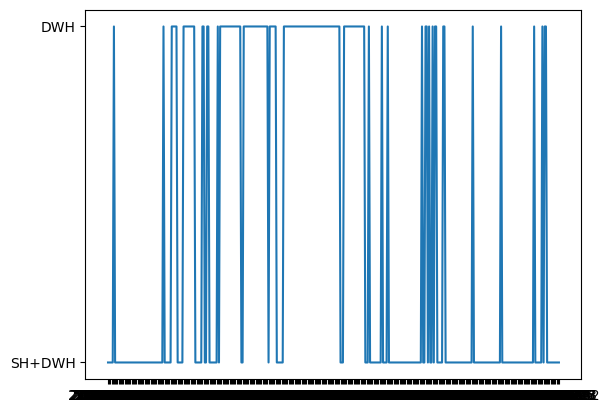

In [134]:
plt.plot(daily_rounded['Date'],daily_rounded['Heating_Period'])

plt.show()

In [158]:
norm_stat = pd.DataFrame(daily_rounded)

In [159]:
columns_to_normalize = daily_rounded.columns.drop(['Date','Heating_Period'])


In [160]:
columns_to_normalize

Index(['Gas_sum', 'ext_temp_max', 'ext_temp_min', 'ext_temp_mean',
       'ext_hum_max', 'ext_hum_min', 'ext_hum_mean', 'SH_temp_max',
       'SH_temp_min', 'SH_temp_mean', 'SH_hum_max', 'SH_hum_min',
       'SH_hum_mean', 'DWH_temp_max', 'DWH_temp_min', 'DWH_temp_mean',
       'DWH_hum_max', 'DWH_hum_min', 'DWH_hum_mean'],
      dtype='object')

In [161]:
scaler = MinMaxScaler()
norm_stat[columns_to_normalize] = scaler.fit_transform(norm_stat[columns_to_normalize])


In [169]:

# Define the function to classify periods with weighted importance
def classify_heating_period(row):
    ext_temp_weight = 1.0
    sh_temp_weight = 0.5
    
    # Calculate a weighted score for classification
    score = (row['ext_temp_mean'] * ext_temp_weight + 
             row['SH_temp_max'] * sh_temp_weight + 
             row['SH_temp_min'] * sh_temp_weight) / (ext_temp_weight + sh_temp_weight * 2)
    
    # Classification logic
    if score < 0.5:  # Adjusted threshold for normalized values
        return 'SH+DWH'
    else:
        return 'DWH'

In [175]:
daily_rounded['Heating_Period'] = norm_stat.apply(classify_heating_period, axis=1)

In [171]:
norm_stat['Heating_Period']

0      SH+DWH
1      SH+DWH
2      SH+DWH
3      SH+DWH
4      SH+DWH
        ...  
378    SH+DWH
379    SH+DWH
380    SH+DWH
381    SH+DWH
382    SH+DWH
Name: Heating_Period, Length: 383, dtype: object

In [176]:
daily_rounded.head(50)

,Date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean,Heating_Period
0,2020-02-14,5.0,11.0,3.0,7.0,90.0,70.0,80.0,23.0,17.0,...,65.0,52.0,59.0,26.0,18.0,22.0,67.0,44.0,56.0,SH+DWH
1,2020-02-15,5.0,12.0,6.0,10.0,89.0,70.0,81.0,22.0,18.0,...,66.0,57.0,61.0,25.0,18.0,21.0,65.0,48.0,58.0,SH+DWH
2,2020-02-16,3.0,10.0,6.0,8.0,84.0,54.0,69.0,22.0,18.0,...,62.0,49.0,58.0,22.0,17.0,20.0,64.0,47.0,57.0,SH+DWH
3,2020-02-17,4.0,10.0,6.0,7.0,78.0,57.0,64.0,25.0,18.0,...,62.0,45.0,54.0,24.0,17.0,20.0,56.0,48.0,53.0,SH+DWH
4,2020-02-18,3.0,10.0,4.0,6.0,80.0,60.0,69.0,21.0,18.0,...,60.0,53.0,56.0,23.0,17.0,20.0,57.0,50.0,54.0,SH+DWH
5,2020-02-19,2.0,10.0,3.0,7.0,88.0,70.0,77.0,20.0,17.0,...,61.0,54.0,58.0,20.0,16.0,18.0,60.0,52.0,57.0,SH+DWH
6,2020-02-20,4.0,11.0,5.0,7.0,86.0,59.0,73.0,21.0,16.0,...,64.0,57.0,61.0,22.0,16.0,19.0,65.0,51.0,59.0,SH+DWH
7,2020-02-21,3.0,11.0,5.0,9.0,76.0,66.0,72.0,21.0,16.0,...,62.0,56.0,59.0,19.0,16.0,18.0,62.0,56.0,60.0,SH+DWH
8,2020-02-22,4.0,12.0,7.0,9.0,82.0,50.0,68.0,21.0,17.0,...,67.0,53.0,60.0,22.0,17.0,19.0,100.0,51.0,61.0,SH+DWH
9,2020-02-23,5.0,8.0,5.0,6.0,92.0,61.0,77.0,24.0,18.0,...,66.0,57.0,62.0,24.0,18.0,21.0,89.0,56.0,64.0,SH+DWH


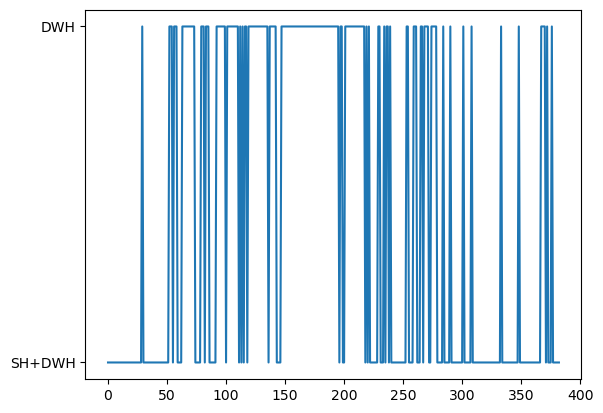

In [172]:
plt.plot(norm_stat['Heating_Period'])

plt.show()